In [1]:
%matplotlib inline
import pyamg
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
def indices_ptoc(i,j,ny):
    ind = ny*i +j
    return( ind)
def indices_ctop(ind,ny):
    j=ind%ny
    i=(ind-j)/ny
    return(i,j)
def get_vort(vxo,vyo,nx,ny):
    vorto=zeros_like(vxo)
    for i in arange(1,nx-1):
        for j in arange(1,ny-1):
            vorto[i,j] =(vxo[i,j+1]-vxo[i,j-1])/(2.*dy)\
            -(vyo[i+1,j]-vyo[i-1,j])/(2.*dx)
    return vorto
def get_vort2(vxo,vyo,nx,ny,dx,dy):
    vorto=zeros_like(vxo)
    for i in arange(1,nx-1):
        for j in arange(1,ny-1):
            vorto[i,j] =(vxo[i,j+1]-vxo[i,j-1])/(2.*dy)\
            -(vyo[i+1,j]-vyo[i-1,j])/(2.*dx)
    return vorto
nx = 66
ny=66
i=0
cnt=0
extent = 1.
global dx
dx=extent/nx
#dx=1.                                                                           
global dy
dy=extent/ny

xl=zeros(nx)
yl=zeros(ny)

for i in arange(0,nx):
    if i<nx/2:
        xl[i]=-dx*(nx/2-1-i)
    if i>=nx/2:
        xl[i]=dx*(i+1-nx/2)

for i in arange(0,ny):
    if i<nx/2:
        yl[i]=-dx*(nx/2-1-i)
    if i>=nx/2:
        yl[i]=dx*(i+1-ny/2)



//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
vx=loadtxt("ux.txt",delimiter=',',dtype='string')
vy=loadtxt("uy.txt",delimiter=',',dtype='string')
rho=loadtxt("rho.txt",delimiter=',',dtype='string')
En=loadtxt("E.txt",delimiter=',',dtype='string')

In [4]:
#nx = 64
#ny=64
vxo=zeros((nx,ny))
vyo=zeros((nx,ny))
dno=zeros((nx,ny),dtype='double')
E=zeros((nx,ny),dtype='double')

vxo0=zeros((nx,ny))
vyo0=zeros((nx,ny))
dno0=zeros((nx,ny),dtype='double')
E0=zeros((nx,ny),dtype='double')

ind1=103
for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
    vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
    vyo[indices_ctop(ind,ny)]=vy[ind1][ind]
    dno[indices_ctop(ind,ny)]=rho[ind1][ind]
    E[indices_ctop(ind,ny)]=En[ind1][ind]
    vxo0[indices_ctop(ind,ny)]=vx[0][ind]
    vyo0[indices_ctop(ind,ny)]=vy[0][ind]
    dno0[indices_ctop(ind,ny)]=rho[0][ind]
    E0[indices_ctop(ind,ny)]=En[0][ind]
    

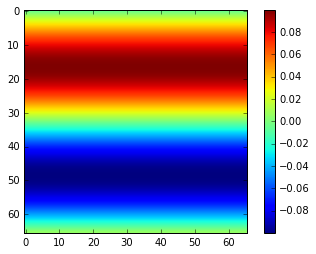

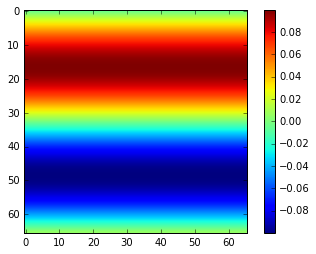

In [5]:
imshow(vxo.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(2)
imshow(vxo0.T)
colorbar()
#print dno[0,0]
#print dno.T.shape
#print vxo[25,:]
#print E[50,:]
#print En[37][100:500]

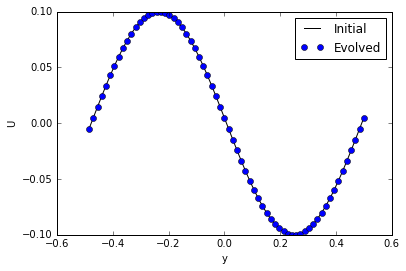

In [6]:
plot(xl,vxo0.T[:,nx/2],'k',label='Initial')
plot(xl[::1],vxo.T[::1,nx/2],'bo',label = 'Evolved')
#plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')
savefig("1dShear_U_64.pdf")

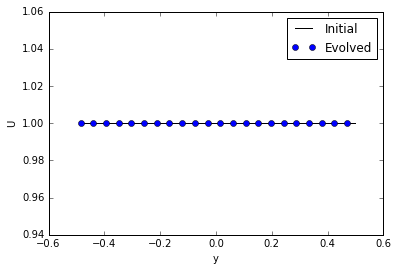

In [7]:
plot(xl,dno0.T[:,nx/2],'k',label='Initial')
plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')
#savefig('1dshear_rho.pdf')


In [270]:
#now for the Hydrostatic Equilibrium Case
vx=loadtxt("output_HydroEq/ux.txt",delimiter=',',dtype='string')
vy=loadtxt("output_HydroEq/uy.txt",delimiter=',',dtype='string')
rho=loadtxt("output_HydroEq/rho.txt",delimiter=',',dtype='string')
En=loadtxt("output_HydroEq/E.txt",delimiter=',',dtype='string')

In [271]:
#nx = 64
#ny=64
vxo=zeros((nx,ny))
vyo=zeros((nx,ny))
dno=zeros((nx,ny),dtype='double')
E=zeros((nx,ny),dtype='double')

vxo0=zeros((nx,ny))
vyo0=zeros((nx,ny))
dno0=zeros((nx,ny),dtype='double')
E0=zeros((nx,ny),dtype='double')

ind1=18
for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
    vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
    vyo[indices_ctop(ind,ny)]=vy[ind1][ind]
    dno[indices_ctop(ind,ny)]=rho[ind1][ind]
    E[indices_ctop(ind,ny)]=En[ind1][ind]
    vxo0[indices_ctop(ind,ny)]=vx[0][ind]
    vyo0[indices_ctop(ind,ny)]=vy[0][ind]
    dno0[indices_ctop(ind,ny)]=rho[0][ind]
    E0[indices_ctop(ind,ny)]=En[0][ind]

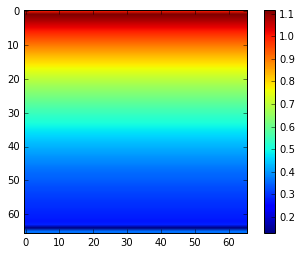

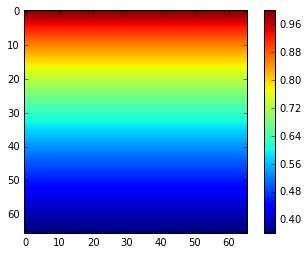

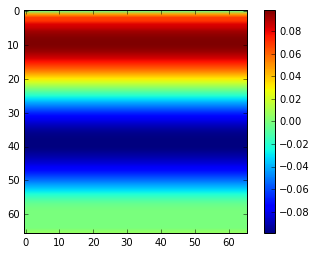

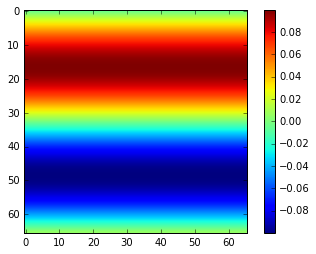

In [272]:
figure(1)
imshow(dno.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(2)
imshow(dno0.T)
colorbar()
figure(3)
imshow(vxo.T)#,vmin=.99999,vmax=1.00001)
colorbar()
figure(4)
imshow(vxo0.T)
colorbar()

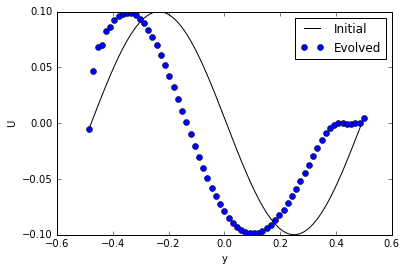

In [273]:
plot(xl,vxo0.T[:,nx/2],'k',label='Initial')
plot(xl[::1],vxo.T[::1,nx/2],'bo',label = 'Evolved')
#plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')

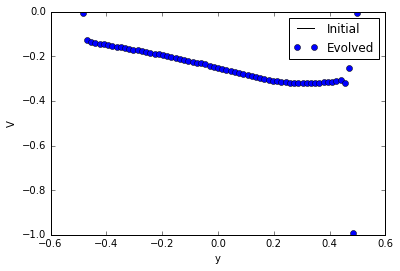

In [274]:
plot(xl,vyo0.T[:,nx/2],'k',label='Initial')
plot(xl[::1],vyo.T[::1,nx/2],'bo',label = 'Evolved')
#plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('V')

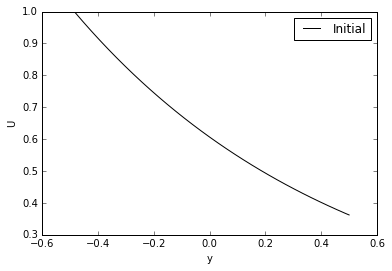

In [275]:
plot(xl,dno0.T[:,nx/2],'k',label='Initial')
#plot(xl[::3],dno.T[::3,nx/2],'bo',label = 'Evolved')
legend()
xlabel('y')
ylabel('U')

t
t
t
t
t
t
t


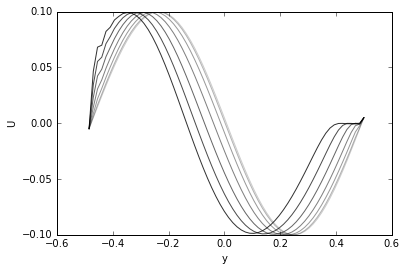

In [276]:
#now set up the evolution plots
alpha1=.1
for ind1 in arange(0,19,3):

    for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
        vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
        
        dno[indices_ctop(ind,ny)]=rho[ind1][ind]
        
        vxo0[indices_ctop(ind,ny)]=vx[0][ind]
        
        dno0[indices_ctop(ind,ny)]=rho[0][ind]
    print "t"
    alpha1+=.1
    plot(xl[::1],vxo.T[::1,nx/2],'k',label = 'Evolved',alpha=alpha1)
    
xlabel('y')
ylabel('U')
savefig("1dShear_HydroEq_U.pdf")

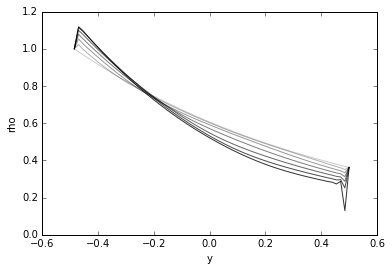

In [277]:
#now set up the evolution plots
alpha1=.1
for ind1 in arange(0,19,3):

    for ind in arange(0,nx*ny):
    #dno[indices_ctop(ind,ny)]=density[150][ind]
        vxo[indices_ctop(ind,ny)]=vx[ind1][ind]
        
        dno[indices_ctop(ind,ny)]=rho[ind1][ind]
        
        vxo0[indices_ctop(ind,ny)]=vx[0][ind]
        
        dno0[indices_ctop(ind,ny)]=rho[0][ind]
    
    alpha1+=.1
    plot(xl[::1],dno.T[::1,nx/2],'k',label = 'Evolved',alpha=alpha1)
    
xlabel('y')
ylabel('rho')
savefig("1dShear_HydroEq_rho.pdf")

(66,)
[ 1.        0.984536  0.969233  0.954248  0.939413  0.924891  0.91051
  0.896438  0.882496  0.86886 ]
0.984536
0.984544
1.0
0.969233


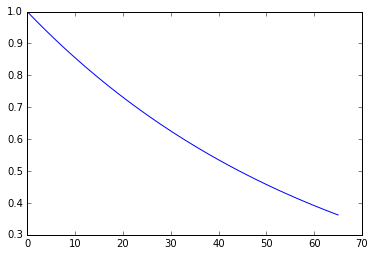

In [282]:
#set up the hydrostatic equilibrium
extent = 1.
dx=1./64.
dy= 1./64.
dn = dno0.T[::1,nx/2]
#plot(dn)
print dn.shape
print dn[0:10]

print dn[1]
print (dn[0]-dn[2])/(2.*dx)
rho_num = np.zeros_like(dn)

rho_num[0]=dn[0]
print dn[0]
print dn[2]
rho_num[1]=dn[1]
for i in arange(2,len(dn)):
    rho_num[i]=-1.*1.*2.*dx*dn[i-1]+dn[i-2]
#plot(rho_num,'bo')

plot(dn)


0.984536496757
0.969233234476
0.969233234476
0.95424795818
0.984536496757
0.984536496757
0.984544
0.984536
0.015625
[ 1.          0.9845365   0.96923323  0.95424796  0.93941299  0.9248913
  0.91051013  0.89643786  0.88249645  0.86885985  0.85534458  0.84213033
  0.82902801  0.8162232   0.80352103  0.79111317  0.77879874  0.76677571
  0.754837    0.74318705  0.73161241  0.72032417  0.70910228  0.69816472
  0.68728463  0.67668708  0.66613816  0.65587026  0.64564221  0.63569394
  0.62577678  0.61613841  0.60652245  0.59718459  0.58786043  0.57881395
  0.5697725   0.56100856  0.55224098  0.54375103  0.53524876  0.5270245
  0.51877925  0.51081265  0.50281635  0.49509964  0.48734449  0.47987013
  0.47234855  0.46510923  0.45781388  0.45080255  0.4437263   0.4369361
  0.43007205  0.42349635  0.41683779  0.41047017  0.40401059  0.39784484
  0.39157794  0.38560803  0.37952769  0.37374779  0.36784807  0.36225254]


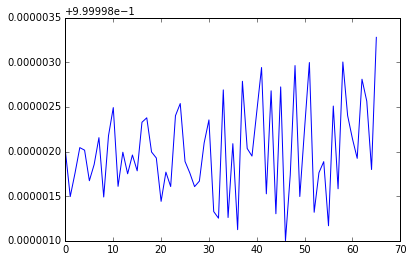

In [287]:
#construct the numerical solution

rho_num = np.zeros_like(dn)
rho_num[0]=1.
rho_num[2] = np.exp(-2.*dx)


rho_num[1]=(rho_num[0]-rho_num[2])/(2.*dy)
for i in arange(3,len(dn)):
    rho_num[i]=-1.*1.*2.*dx*rho_num[i-1]+rho_num[i-2]
#plot(rho_num[0:])
#plot(dn)
plot(dn/rho_num)
print rho_num[1]
print np.exp(-2.*dx)

print rho_num[2]
print rho_num[3]


print (-rho_num[2]+rho_num[0])/(2.*dx)
print rho_num[1]

print (-dn[2]+dn[0])/(2.*dx)
print dn[1]
print dx
print rho_num

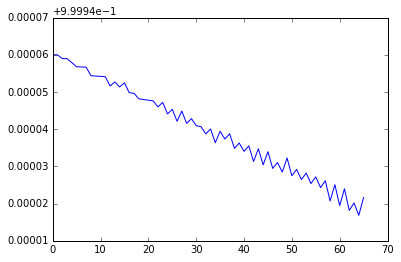

In [162]:
#plot(dn)
#plot(dno0.T[::1,nx/2])
plot(dn/dno0.T[::1,nx/2])